#Superstore Sales Forescating


## Market Sales Exploratory Data Analysis (EDA)

## Import librarries and read dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', 500)

In [ ]:
sales_df = pd.read_csv("/content/train.csv")

## Data overview

In [ ]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
sales_df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
6800,6801,CA-2017-109827,25/12/2017,01/01/2018,Standard Class,LW-16825,Laurel Workman,Corporate,United States,Phoenix,Arizona,85023.0,West,TEC-MA-10003356,Technology,Machines,Panasonic KX MC6040 Color Laser Multifunction ...,269.970
7509,7510,US-2018-161935,14/07/2018,18/07/2018,Standard Class,JL-15835,John Lee,Consumer,United States,Columbus,Ohio,43229.0,East,TEC-PH-10000560,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,1889.946
6511,6512,CA-2018-167640,06/03/2018,10/03/2018,Standard Class,FC-14245,Frank Carlisle,Home Office,United States,San Francisco,California,94109.0,West,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,23.880
1583,1584,CA-2016-131338,09/08/2016,12/08/2016,First Class,NP-18325,Naresj Patel,Consumer,United States,New York City,New York,10024.0,East,FUR-FU-10002157,Furniture,Furnishings,Artistic Insta-Plaque,47.040
4804,4805,CA-2018-136364,13/07/2018,17/07/2018,Second Class,MH-17455,Mark Hamilton,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,91.008


In [ ]:
def overview(df):
    l = []
    columns = df.columns
    for column in columns:
        nunique = df[column].nunique()
        sum_null = df[column].isnull().sum()
        dtypes = df[column].dtypes
        l.append([column, nunique, sum_null, dtypes])
    df_overviewed = pd.DataFrame(l)
    df_overviewed.columns = ["column", "nunique", "null", "dtypes"]
    return df_overviewed


In [ ]:
overview(sales_df)

,column,nunique,null,dtypes
0,Row ID,9800,0,int64
1,Order ID,4922,0,object
2,Order Date,1230,0,object
3,Ship Date,1326,0,object
4,Ship Mode,4,0,object
5,Customer ID,793,0,object
6,Customer Name,793,0,object
7,Segment,3,0,object
8,Country,1,0,object
9,City,529,0,object


## Null data

In [ ]:
sales_df[sales_df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
sales_df["Postal Code"] = sales_df["Postal Code"].fillna(5401)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## Check duplicates

In [ ]:
sales_df[sales_df.duplicated()].sum()

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

## Validation date columns

In [ ]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"],  format= '%d/%m/%Y')
sales_df["Ship Date"] = pd.to_datetime(sales_df["Ship Date"], format= '%d/%m/%Y')
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Cleaning data

In [ ]:
sales_df["Date_dif"] = sales_df["Ship Date"] - sales_df["Order Date"]
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [ ]:
sales_df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Date_dif         timedelta64[ns]
dtype: object

In [ ]:
sales_df["Date_dif"] = sales_df["Date_dif"].astype("str")

In [ ]:
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7 days
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5 days
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5 days
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5 days


In [ ]:
days = sales_df["Date_dif"].str.split()
days_dif = []
for day in days:
    number_days = day[0]
    days_dif.append(number_days)

In [ ]:
sales_df["Days_dif"] = days_dif

In [ ]:
sales_df["Days_dif"] = sales_df["Days_dif"].astype(int)

In [ ]:
sales_df.drop(["Date_dif"], axis = 1, inplace = True)

In [ ]:
sales_df[sales_df["Days_dif"] < 0].sum()

<ipython-input-22-36cd9bc7cc44>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_df[sales_df["Days_dif"] < 0].sum()


Row ID           0.0
Order ID         0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Days_dif         0.0
dtype: float64

In [ ]:
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [ ]:
sales_df["Country"].unique()

array(['United States'], dtype=object)

In [ ]:
sales_df.drop(["Country", "Row ID"], axis = 1, inplace = True)

In [ ]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


## Add date columns

In [ ]:
sales_df['Year'] = sales_df['Order Date'].dt.year
sales_df['Month'] = sales_df['Order Date'].dt.month
sales_df['Day'] = sales_df['Order Date'].dt.day

In [ ]:
sales_df["Day of Week"] = sales_df["Order Date"].dt.strftime("%A")

In [ ]:
sales_df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017,11,8,Wednesday
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017,11,8,Wednesday
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,6,12,Monday
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016,10,11,Tuesday
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016,10,11,Tuesday


## Exploratory Data Analysis

In [ ]:
sales_df["Category"].unique(), sales_df["Ship Mode"].unique(), sales_df["Sub-Category"].unique()

(array(['Furniture', 'Office Supplies', 'Technology'], dtype=object),
 array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
        'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
        'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
        'Copiers'], dtype=object))

In [ ]:
sales_df.groupby(["Category", "Sub-Category"]).agg({"Sales": "sum"})

Sales
Category        Sub-Category             
Furniture       Bookcases     113813.1987
                Chairs        322822.7310
                Furnishings    89212.0180
                Tables        202810.6280
Office Supplies Appliances    104618.4030
                Art            26705.4100
                Binders       200028.7850
                Envelopes      16128.0460
                Fasteners       3001.9600
                Labels         12347.7260
                Paper          76828.3040
                Storage       219343.3920
                Supplies       46420.3080
Technology      Accessories   164186.7000
                Copiers       146248.0940
                Machines      189238.6310
                Phones        327782.4480

Text(0.5, 1.0, 'Sales by Categories')

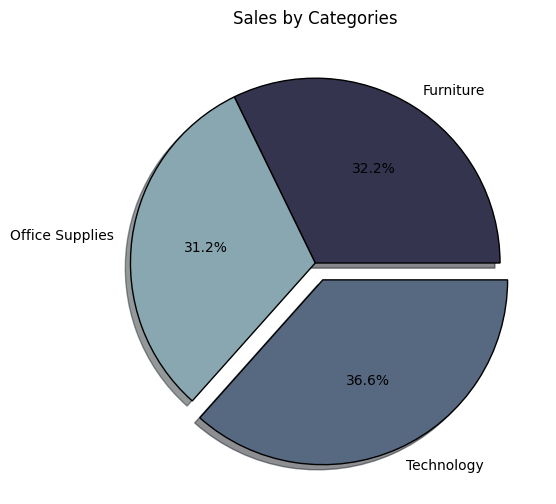

In [ ]:
fig = plt.figure(figsize = (8,6))
sales_category = sales_df.groupby("Category").agg({"Sales": "sum"}).reset_index()
labels = sales_category["Category"].tolist()
myexplode = [0, 0, 0.1]
fig = plt.pie(sales_category["Sales"], labels= labels, shadow=True, explode = myexplode, autopct="%1.1f%%", 
              wedgeprops={"edgecolor":"black"}, colors = ["#34344e", "#89a7b1", "#566981"])
plt.title("Sales by Categories")

In [ ]:
sales_subcategory = sales_df.groupby("Sub-Category").agg({"Sales": "sum"}).reset_index()

fig = px.pie(sales_subcategory, values='Sales', names='Sub-Category', 
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Sales By Sub-Category")

Text(0.5, 1.0, 'Sales by Ship Mode')

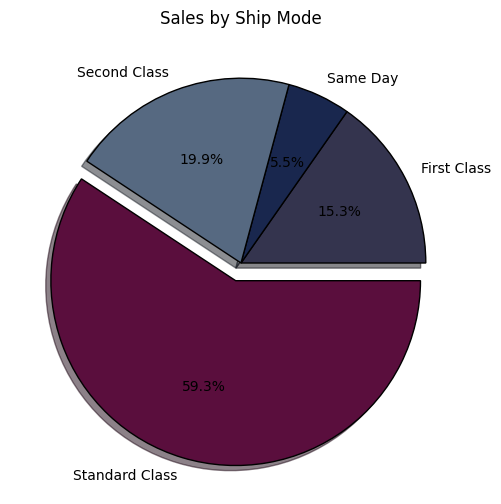

In [ ]:
fig = plt.figure(figsize = (8,6))
sales_shipmode = sales_df.groupby("Ship Mode").agg({"Sales": "sum"}).reset_index()
labels = sales_shipmode["Ship Mode"].tolist()
myexplode = [0, 0, 0, 0.1]
fig = plt.pie(sales_shipmode["Sales"], labels= labels, shadow=True, explode = myexplode, autopct="%1.1f%%", 
              wedgeprops={"edgecolor":"black"}, colors = ["#34344e", "#19274e", "#566981", "#5a0e3d"])
plt.title("Sales by Ship Mode")

In [ ]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9800.0,55217.343265,32066.750532,1040.000,23223.000,57551.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48
Days_dif,9800.0,3.961122,1.749614,0.000,3.000,4.00,5.000,7.00
Year,9800.0,2016.724184,1.123984,2015.000,2016.000,2017.00,2018.000,2018.00
Month,9800.0,7.818469,3.281905,1.000,5.000,9.00,11.000,12.00
Day,9800.0,15.486837,8.753733,1.000,8.000,16.00,23.000,31.00


In [ ]:
sales_df[sales_df["Sales"] == 22638.48]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,5,2015,3,18,Wednesday


In [ ]:
sales_df[sales_df["Sales"] == 0.444]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
4101,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,4,2018,6,19,Tuesday


In [ ]:
top_cities = sales_df.pivot_table(values = "Sales", aggfunc= "sum", index= "City")
top_cities = top_cities.sort_values(by=["Sales"], ascending= False).head(15)
top_cities = top_cities["Sales"].round(2)
top_cities = top_cities.reset_index()
top_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


In [ ]:
fig_labels = {"Sales": "Sales", "City": "Best Cities"}
fig = px.bar(top_cities,y = "Sales", x = "City", color='Sales', title = "Top 15 Sales by Cities", labels = fig_labels)
fig.show()

In [ ]:
month_avg = sales_df.pivot_table(values = "Sales", aggfunc= "mean", index= "Month")
month_avg = month_avg.sort_values(by=["Month"], ascending= True)
month_avg = month_avg["Sales"].round(2)
month_avg = month_avg.reset_index()
month_avg

,Month,Sales
0,1,257.63
1,2,199.90
2,3,290.55
3,4,207.43
4,5,212.53
5,6,211.05
6,7,208.80
7,8,227.01
8,9,221.64
9,10,246.60


In [ ]:
fig_labels = {"Sales": "Sales", "Month": "Month"}
fig = px.bar(month_avg,y = "Sales", x = "Month", color='Sales', title = "Average Sales per Month", labels = fig_labels)
fig.show()

Text(0, 0.5, 'Sales (Sum)')

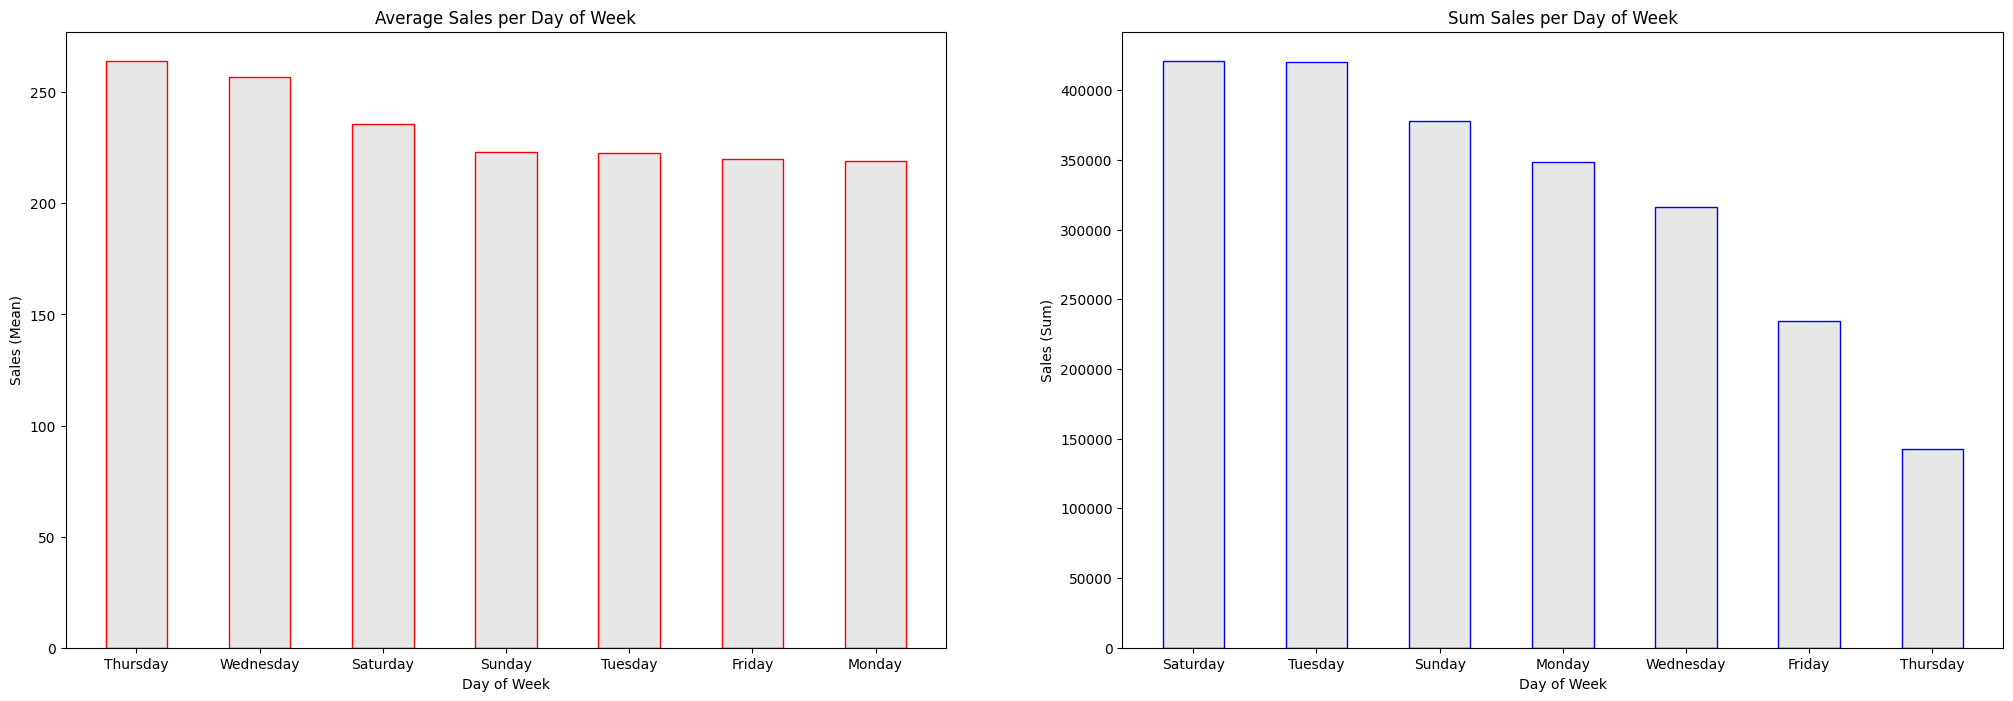

In [ ]:
day_of_week_avg = sales_df.pivot_table(values = "Sales", aggfunc= "mean", index= "Day of Week")
day_of_week_avg = day_of_week_avg.sort_values(by=["Sales"], ascending= False)
day_of_week_avg = day_of_week_avg.reset_index()

day_of_week_sum = sales_df.pivot_table(values = "Sales", aggfunc= "sum", index= "Day of Week")
day_of_week_sum = day_of_week_sum.sort_values(by=["Sales"], ascending= False)
day_of_week_sum = day_of_week_sum.reset_index()

fig = plt.figure(figsize= [25,8
                           ])
ax = fig.add_subplot(1,2,1)



ax.bar(day_of_week_avg["Day of Week"], day_of_week_avg["Sales"], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red', width = 0.5)
ax.set_title("Average Sales per Day of Week")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Sales (Mean)")


ax2 = fig.add_subplot(1,2,2)

ax2.bar(day_of_week_sum["Day of Week"], day_of_week_sum["Sales"], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue', width = 0.5)
ax2.set_title("Sum Sales per Day of Week")
ax2.set_xlabel("Day of Week")
ax2.set_ylabel("Sales (Sum)")



<Axes: title={'center': 'Sales by Region'}, xlabel='Region', ylabel='Sales'>

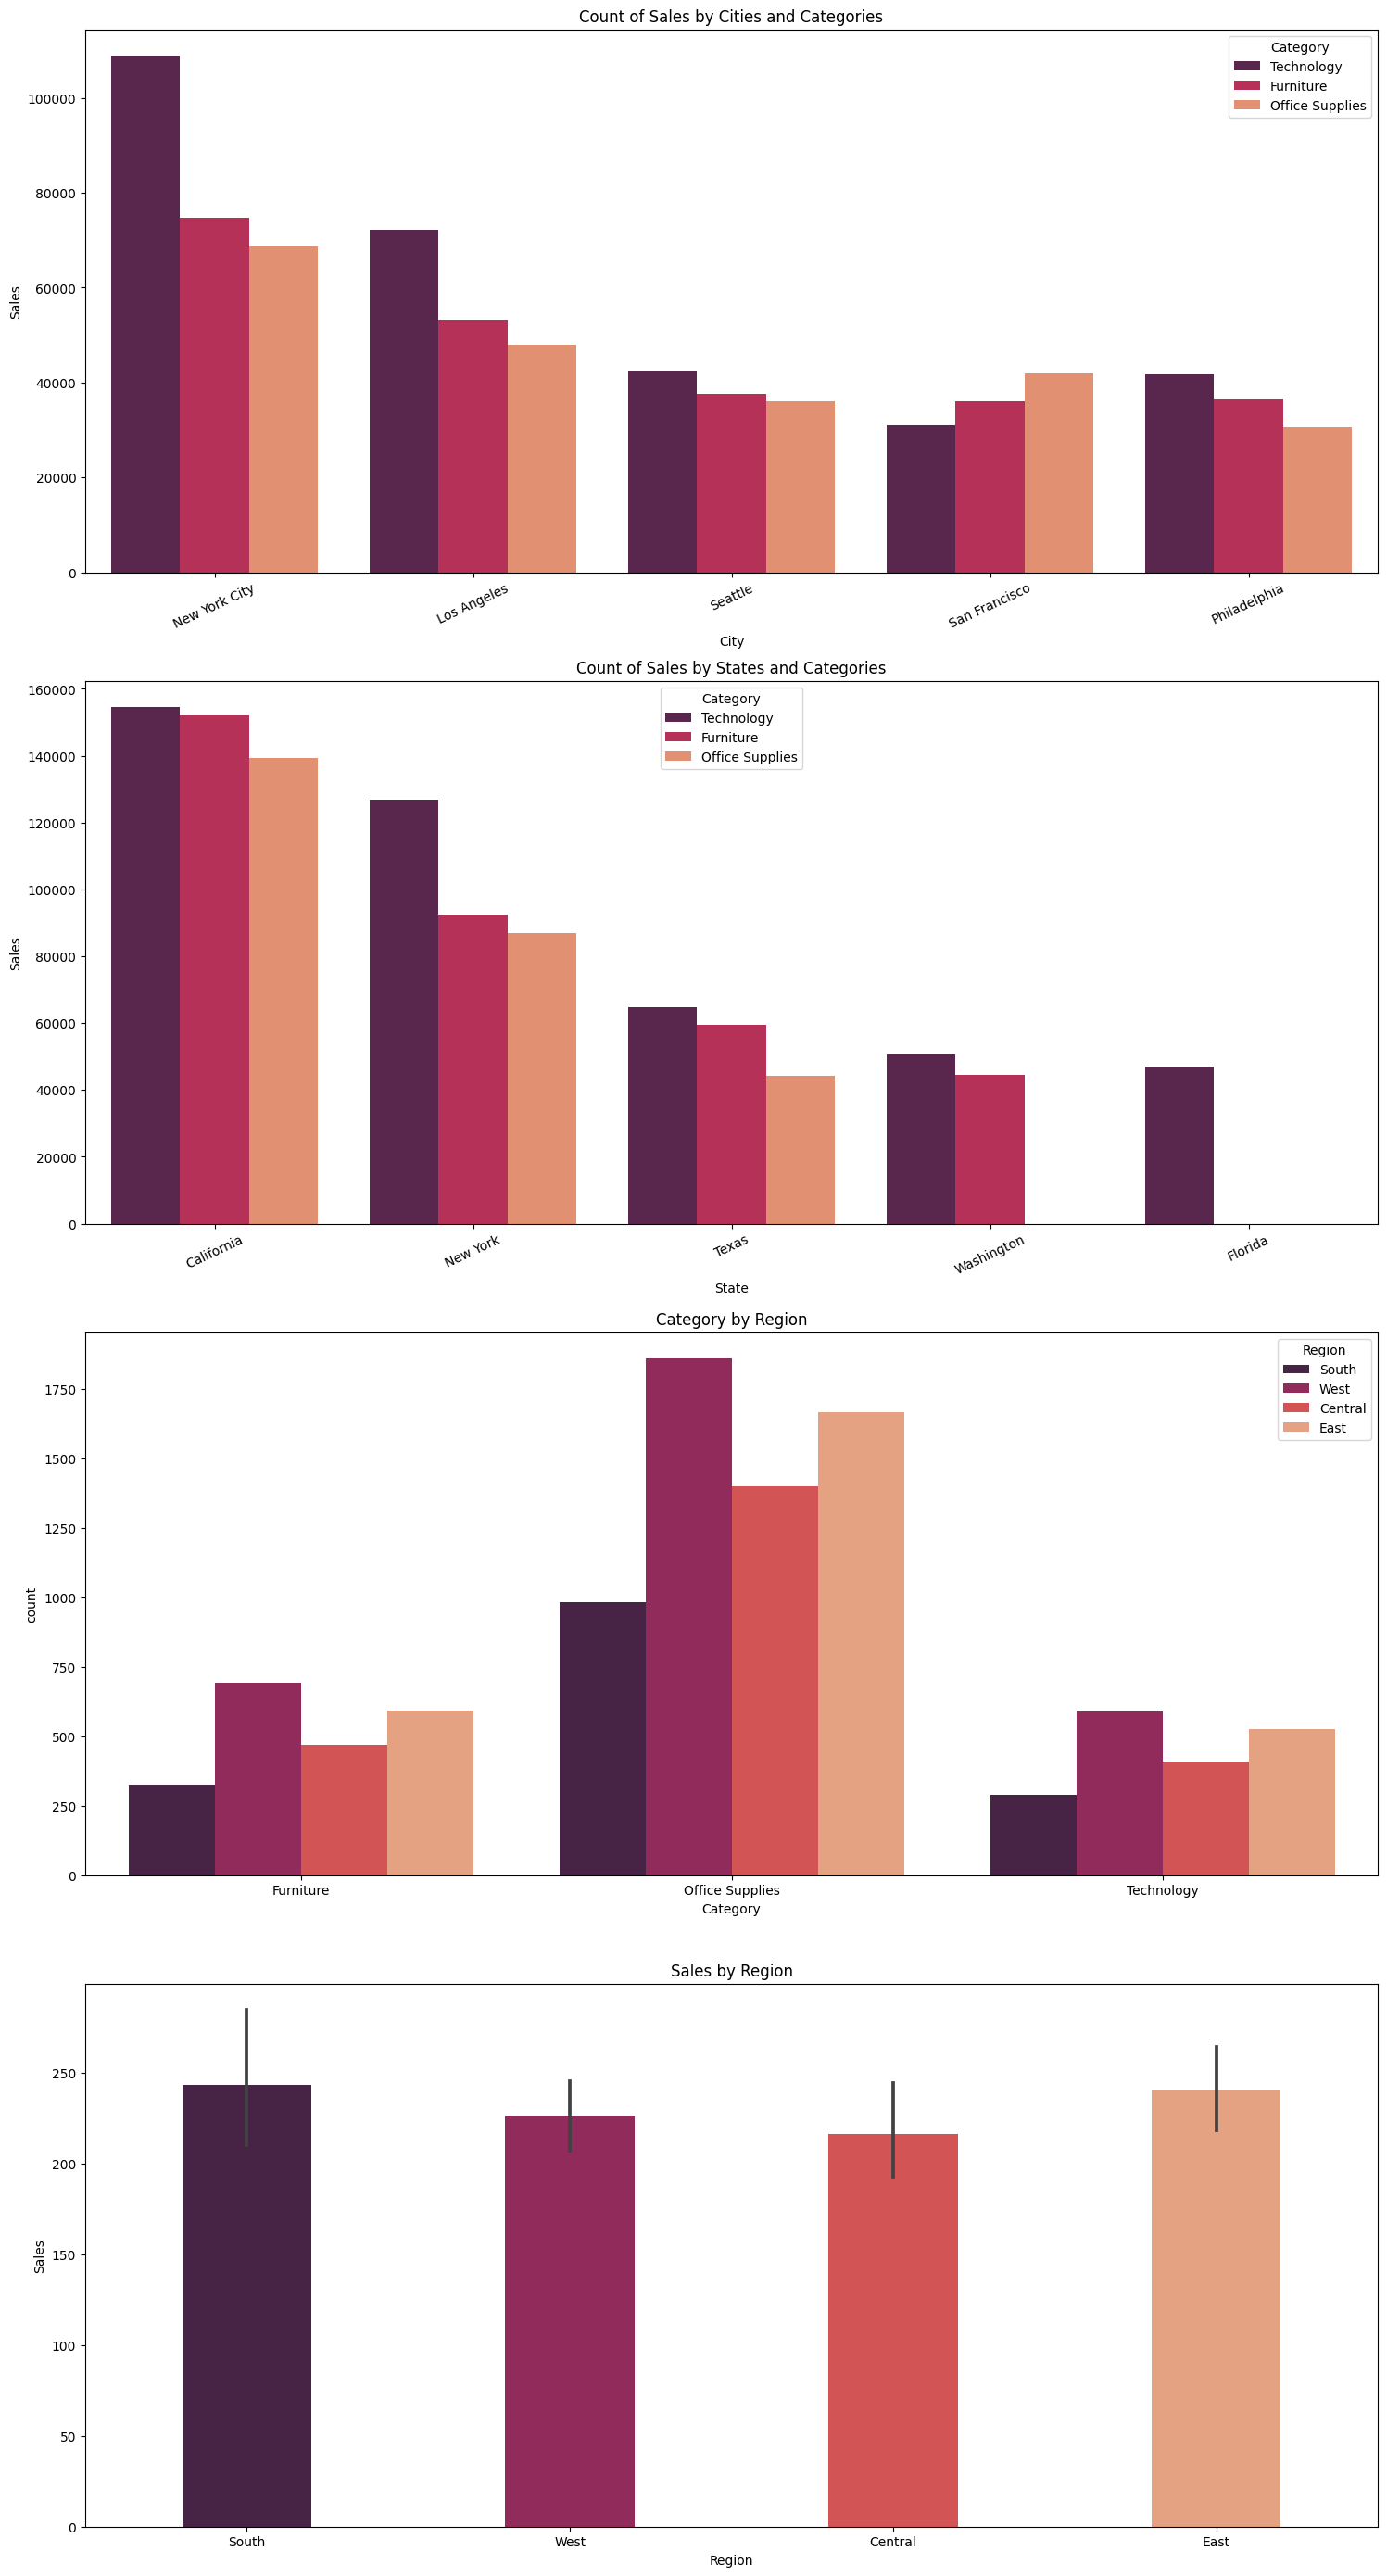

In [ ]:
best_cities_categories = sales_df.groupby(["Category", "City"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(15)
best_cities_categories = best_cities_categories["Sales"].round(2)
best_cities_categories = best_cities_categories.reset_index()

best_states_categories = sales_df.groupby(["Category", "State"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(12)
best_states_categories = best_states_categories["Sales"].round(2)
best_states_categories = best_states_categories.reset_index()

plt.figure(figsize = (18, 35))

plt.subplot(4,1,1)

plt.title("Count of Sales by Cities and Categories")
plt.xticks(rotation=25)
sns.barplot(x='City',y='Sales',hue='Category',data=best_cities_categories,palette="rocket")

plt.subplot(4,1,2)

plt.title("Count of Sales by States and Categories")
plt.xticks(rotation=25)
sns.barplot(x='State',y='Sales',hue='Category',data=best_states_categories,palette="rocket")

plt.subplot(4,1,3)
plt.title("Category by Region")
sns.countplot(data = sales_df, x = "Category", hue = "Region", palette="rocket")

plt.subplot(4,1,4)
plt.title("Sales by Region")
sns.barplot(data = sales_df, x = "Region", y = "Sales", palette="rocket", width= 0.4 )


<Axes: title={'center': 'Top 10 Customers'}, xlabel='Customer Name', ylabel='Sales'>

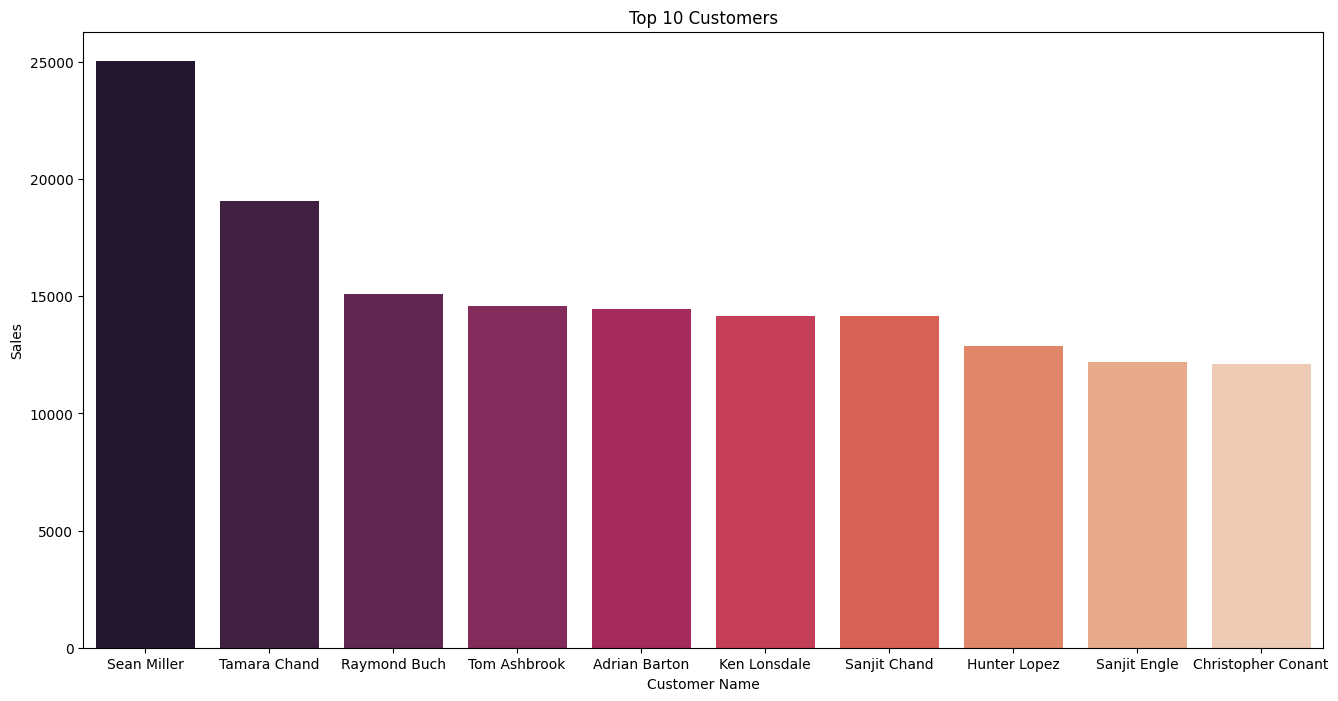

In [ ]:
top_customer = sales_df.groupby(["Customer Name"]).agg({"Sales": "sum"}).sort_values("Sales", ascending= False).head(10)
top_customer = top_customer.reset_index()

plt.figure(figsize=(16,8))
plt.title("Top 10 Customers")

sns.barplot(x = "Customer Name", y = "Sales", data = top_customer, palette = "rocket")


Text(0, 0.5, 'Count of Customers')

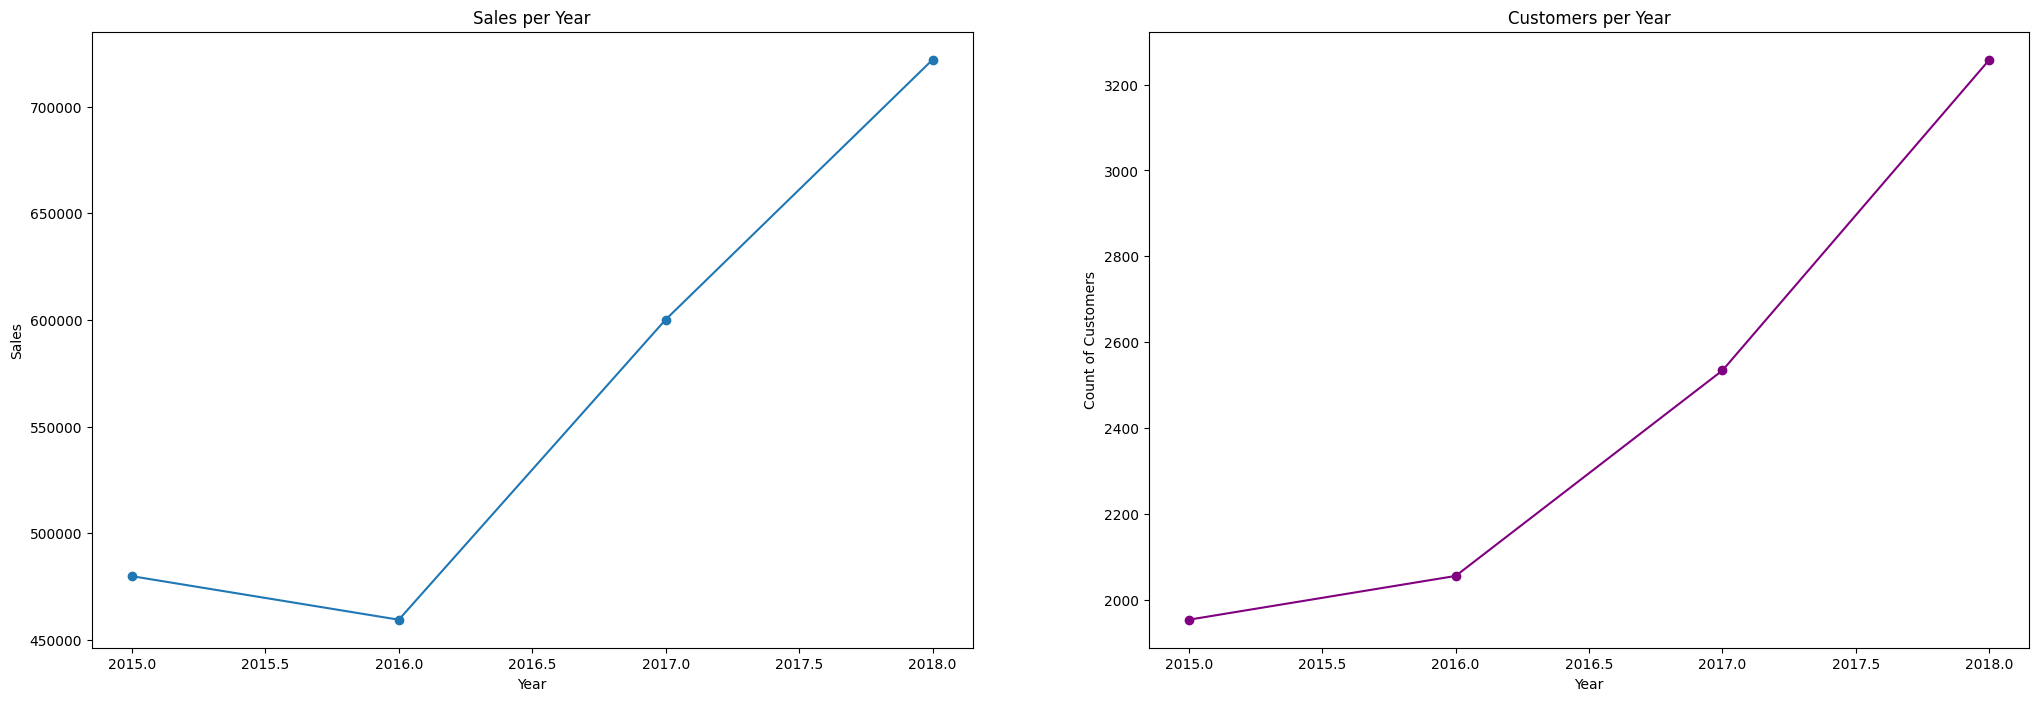

In [ ]:
sales_year = sales_df.groupby(["Year"]).agg({"Sales":"sum"}).sort_values("Year", ascending = True)
sales_year = sales_year.reset_index()

count_customers = sales_df.groupby(["Year"]).agg({"Customer Name": "count"}).sort_values("Year", ascending = True)
count_customers = count_customers.reset_index()

fig = plt.figure(figsize = (25, 8))
ax = fig.add_subplot(1,2,1)

ax.plot(sales_year["Year"], sales_year["Sales"], marker = "o")
ax.set_title("Sales per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Sales")

ax2 = fig.add_subplot(1,2,2)

ax2.plot(count_customers["Year"], count_customers["Customer Name"], marker = "o", color = "purple")
ax2.set_title("Customers per Year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Count of Customers")



## Application of Sales Forecast

## Install and Import libraries

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from sklearn.model_selection import ParameterGrid
from prophet.plot import plot_plotly, plot_components_plotly

## Sales Pattern View

In [ ]:
start_date = "2018-01-01"
end_date = "2018-12-29"
mask = (sales_df["Order Date"] >= start_date) & (sales_df["Order Date"] <= end_date)
sales_select = sales_df.loc[mask]
sales_select.set_index("Order Date", inplace = True)


In [ ]:
sales_view = sales_select.groupby(["Order Date"]).agg({"Sales":"sum"}).sort_values("Order Date", ascending = True)
sales_view = sales_view.reset_index()
sales_view

,Order Date,Sales
0,2018-01-01,1481.8280
1,2018-01-02,2079.5540
2,2018-01-03,2070.2720
3,2018-01-06,33.7400
4,2018-01-07,3395.5900
...,...,...
316,2018-12-25,2698.9270
317,2018-12-26,814.5940
318,2018-12-27,177.6360
319,2018-12-28,1657.3508


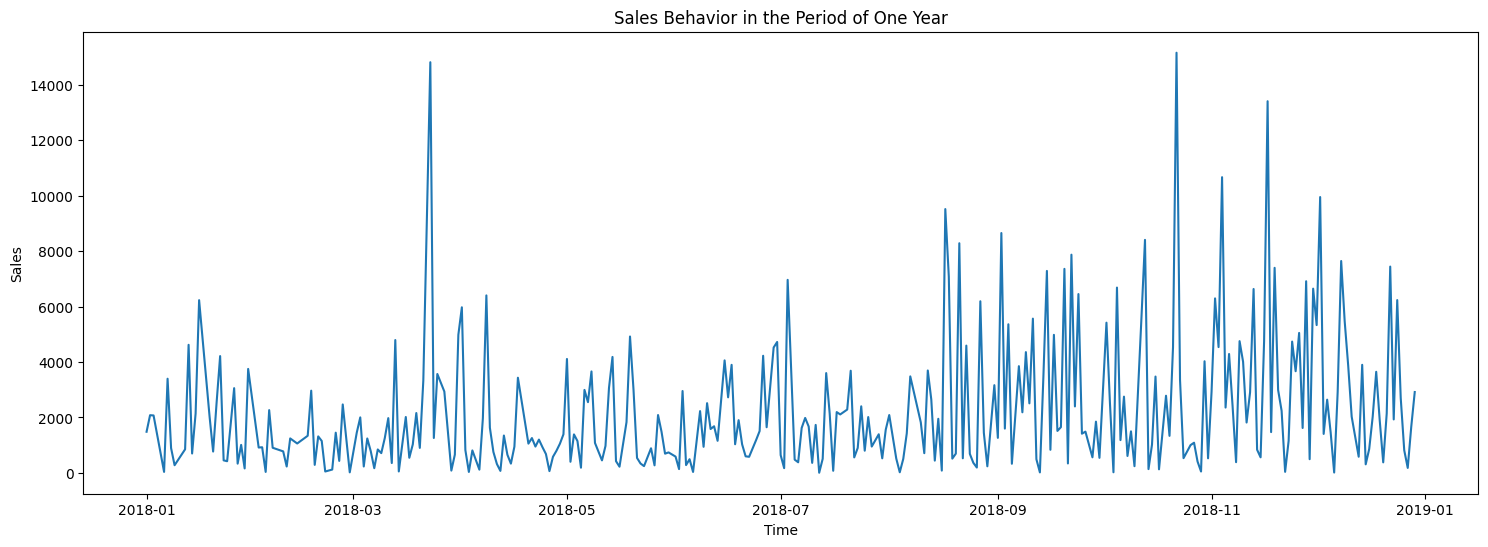

In [ ]:
plt.figure(figsize = (18,6))
plt.plot(sales_view["Order Date"], sales_view["Sales"], )
plt.title("Sales Behavior in the Period of One Year")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

## Data Transformation

In [ ]:
sales_ordered = sales_df.sort_values(by= "Order Date", ascending = True)

In [ ]:
sales_ordered

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Days_dif,Year,Month,Day,Day of Week
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,4,2015,1,3,Saturday
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,4,2015,1,4,Sunday
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,4,2015,1,4,Sunday
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,4,2015,1,4,Sunday
1759,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,7,2015,1,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,CA-2018-115427,2018-12-30,2019-01-03,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,4,2018,12,30,Sunday
906,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,2018,12,30,Sunday
645,CA-2018-126221,2018-12-30,2019-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,6,2018,12,30,Sunday
908,CA-2018-143259,2018-12-30,2019-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,4,2018,12,30,Sunday


In [ ]:
dataset = sales_ordered[:]


In [ ]:
dataset = dataset.rename(columns = {"Order Date": "ds"})
dataset = dataset.rename(columns = {"Sales": "y"})
dataset = dataset[["ds", "y"]]
dataset.reset_index(inplace = True)
dataset.drop("index", axis = 1, inplace = True)

In [ ]:
dataset

,ds,y
0,2015-01-03,16.448
1,2015-01-04,3.540
2,2015-01-04,272.736
3,2015-01-04,11.784
4,2015-01-05,19.536
...,...,...
9795,2018-12-30,20.720
9796,2018-12-30,323.136
9797,2018-12-30,209.300
9798,2018-12-30,52.776


## Initial Prophet Model

In [ ]:
model = Prophet(growth = "linear",
                seasonality_mode = "multiplicative")

In [ ]:
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/yr4a5ptq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/d82gwaaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46535', 'data', 'file=/tmp/tmprygo7ckd/yr4a5ptq.json', 'init=/tmp/tmprygo7ckd/d82gwaaf.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelc6a2tkds/prophet_model-20230418225739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Perfomance Metrics and Cross-Validation

In [ ]:
cross_val = cross_validation(model, horizon = "31 days", initial = "540")

INFO:prophet:Making 92 forecasts with cutoffs between 2015-01-18 12:00:00 and 2018-11-29 00:00:00


  0%|          | 0/92 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/58av1749.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/n0kc38bb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87674', 'data', 'file=/tmp/tmprygo7ckd/58av1749.json', 'init=/tmp/tmprygo7ckd/n0kc38bb.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelgsmszece/prophet_model-20230418225744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/oi4k61rs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/xh_l3ac8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
metrics = performance_metrics(cross_val)

In [ ]:
metrics["rmse"].mean().round(2)

636.23

## Looking for the Best Parameters

In [ ]:
parameters = {'seasonality_prior_scale': [5, 10, 20],
              'changepoint_prior_scale': [0.01, 0.05, 0.1],
              "seasonality_mode": ["multiplicative", "additive"]}
grid = ParameterGrid(parameters)


In [ ]:
rmse = []
for parameters in grid:
  mod = Prophet(seasonality_mode = parameters["seasonality_mode"],
                seasonality_prior_scale = parameters["seasonality_prior_scale"],
                changepoint_prior_scale = parameters['changepoint_prior_scale'])
  mod.fit(dataset) 
  cross = cross_validation(mod, horizon = "31 days")
  new_metrics = performance_metrics(cross)
  error = new_metrics["rmse"].mean().round(2)
  rmse.append(error)
print(grid[np.argmin(rmse)])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/ox3x58pt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/nq_ji0gr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93628', 'data', 'file=/tmp/tmprygo7ckd/ox3x58pt.json', 'init=/tmp/tmprygo7ckd/nq_ji0gr.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modeltlfhm5gr/prophet_model-20230418225959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:59:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:00:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 69 forecasts with cutoffs between 2016-01-10 00:00:00 and 2018-11-29 00:00:00


  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/__1t13nw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/xvoyn61d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23964', 'data', 'file=/tmp/tmprygo7ckd/__1t13nw.json', 'init=/tmp/tmprygo7ckd/xvoyn61d.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modeljbj04y8f/prophet_model-20230418230002.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:00:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:00:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/qhdz1qfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/wtb7luu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/utttjl97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/_zr2ahln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28855', 'data', 'file=/tmp/tmprygo7ckd/utttjl97.json', 'init=/tmp/tmprygo7ckd/_zr2ahln.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelnxco4ies/prophet_model-20230418230133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:01:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:01:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/luanoxk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/muk7uwo9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/b1bo25r5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/c6woqdmz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90175', 'data', 'file=/tmp/tmprygo7ckd/b1bo25r5.json', 'init=/tmp/tmprygo7ckd/c6woqdmz.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modeldep3xoon/prophet_model-20230418230301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:03:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:03:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/6zy0cu_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/rdu1qut2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/vnpphs23.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/3upqmw_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79571', 'data', 'file=/tmp/tmprygo7ckd/vnpphs23.json', 'init=/tmp/tmprygo7ckd/3upqmw_e.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model_rfv6kxe/prophet_model-20230418230427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:04:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:04:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/bvn1uisk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/rtvwuo9n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/80jmm7ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/9ccffwc9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1918', 'data', 'file=/tmp/tmprygo7ckd/80jmm7ku.json', 'init=/tmp/tmprygo7ckd/9ccffwc9.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model50pfg8y_/prophet_model-20230418230539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:05:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:05:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/9qpdsgte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/wi_jrabf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/a1l1g0gq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/nql4pmxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23074', 'data', 'file=/tmp/tmprygo7ckd/a1l1g0gq.json', 'init=/tmp/tmprygo7ckd/nql4pmxn.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelyt4_g6t9/prophet_model-20230418230651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:06:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/izrrfva0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/isck5f8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/opma9kdh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/w45i36de.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25294', 'data', 'file=/tmp/tmprygo7ckd/opma9kdh.json', 'init=/tmp/tmprygo7ckd/w45i36de.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model9wl4uwu1/prophet_model-20230418230803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:08:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:08:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/wng8cj2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/phiknkfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/gf0r37c3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/mlsn6ujk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99100', 'data', 'file=/tmp/tmprygo7ckd/gf0r37c3.json', 'init=/tmp/tmprygo7ckd/mlsn6ujk.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model11l69nr1/prophet_model-20230418230952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:09:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/erzq3frh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/f7qslpmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/xwkk2vhe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/7_iffrrb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53493', 'data', 'file=/tmp/tmprygo7ckd/xwkk2vhe.json', 'init=/tmp/tmprygo7ckd/7_iffrrb.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelx_e2j8t4/prophet_model-20230418231140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/gle8cexz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/1ly2gahe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/phb7daps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/w7qcphho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80690', 'data', 'file=/tmp/tmprygo7ckd/phb7daps.json', 'init=/tmp/tmprygo7ckd/w7qcphho.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelv84eva25/prophet_model-20230418231326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:13:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:13:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/v533q6eo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/zccudn10.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/iwq8u7r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/w7si4csq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62503', 'data', 'file=/tmp/tmprygo7ckd/iwq8u7r9.json', 'init=/tmp/tmprygo7ckd/w7si4csq.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelc_neek_z/prophet_model-20230418231440.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/ncbaxwne.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/1uguozcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/3wkcsr9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/asqjt43b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39980', 'data', 'file=/tmp/tmprygo7ckd/3wkcsr9h.json', 'init=/tmp/tmprygo7ckd/asqjt43b.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model83c99fn7/prophet_model-20230418231553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:15:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/4bfp6ynu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/ml81948k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/zuo_yese.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/7evey26n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31176', 'data', 'file=/tmp/tmprygo7ckd/zuo_yese.json', 'init=/tmp/tmprygo7ckd/7evey26n.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_model6v8iae7i/prophet_model-20230418231713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:17:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/iv8xmwrq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/3x29drqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/3jsfs_8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/gs5d0vwt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64485', 'data', 'file=/tmp/tmprygo7ckd/3jsfs_8s.json', 'init=/tmp/tmprygo7ckd/gs5d0vwt.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelde9zmdsr/prophet_model-20230418231920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/hr98kz8_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/xq4k0su6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/zoq4jaox.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/0cngc_6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82603', 'data', 'file=/tmp/tmprygo7ckd/zoq4jaox.json', 'init=/tmp/tmprygo7ckd/0cngc_6h.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelbhh2amg7/prophet_model-20230418232126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:21:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/2yn28e11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/9e3jut22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/h66e3gsa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/eafob2ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92124', 'data', 'file=/tmp/tmprygo7ckd/h66e3gsa.json', 'init=/tmp/tmprygo7ckd/eafob2ht.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelrj3_wrnu/prophet_model-20230418232330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:23:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:23:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/27kw9zl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/d_g_hq2n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/5hthf83n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/hw9cn9q_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43292', 'data', 'file=/tmp/tmprygo7ckd/5hthf83n.json', 'init=/tmp/tmprygo7ckd/hw9cn9q_.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelitd5mbz5/prophet_model-20230418232454.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:24:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/lzv84p40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/fiu8_krl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

  0%|          | 0/69 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/xtlf2ehu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/f3m09obe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85569', 'data', 'file=/tmp/tmprygo7ckd/xtlf2ehu.json', 'init=/tmp/tmprygo7ckd/f3m09obe.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelfl4r9b1x/prophet_model-20230418232621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:26:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:26:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/n2kroxzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/2em0pymd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

{'seasonality_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01}


In [ ]:
print(grid[np.argmin(rmse)])

{'seasonality_prior_scale': 20, 'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01}


## Final Prophet Model

In [ ]:
final_model = Prophet(changepoint_prior_scale = 0.01, seasonality_prior_scale = 20, seasonality_mode = 'multiplicative')
final_model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/lacty78t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprygo7ckd/rhxcoe4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38580', 'data', 'file=/tmp/tmprygo7ckd/lacty78t.json', 'init=/tmp/tmprygo7ckd/rhxcoe4x.json', 'output', 'file=/tmp/tmprygo7ckd/prophet_modelh807t04o/prophet_model-20230418232747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = final_model.make_future_dataframe(periods = 7, freq = "D", include_history = False)

In [ ]:
predict = final_model.predict(future)

## Forecasting Visualization

In [ ]:
predict[["ds", "yhat"]]

,ds,yhat
0,2018-12-31,220.394929
1,2019-01-01,220.479255
2,2019-01-02,246.892717
3,2019-01-03,236.883971
4,2019-01-04,218.357269
5,2019-01-05,225.750543
6,2019-01-06,212.547470


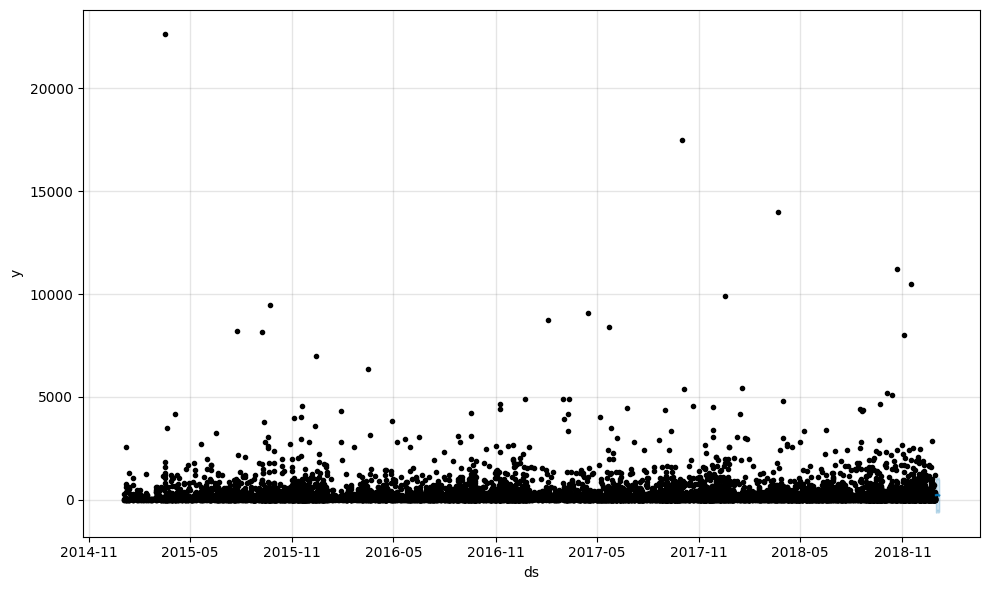

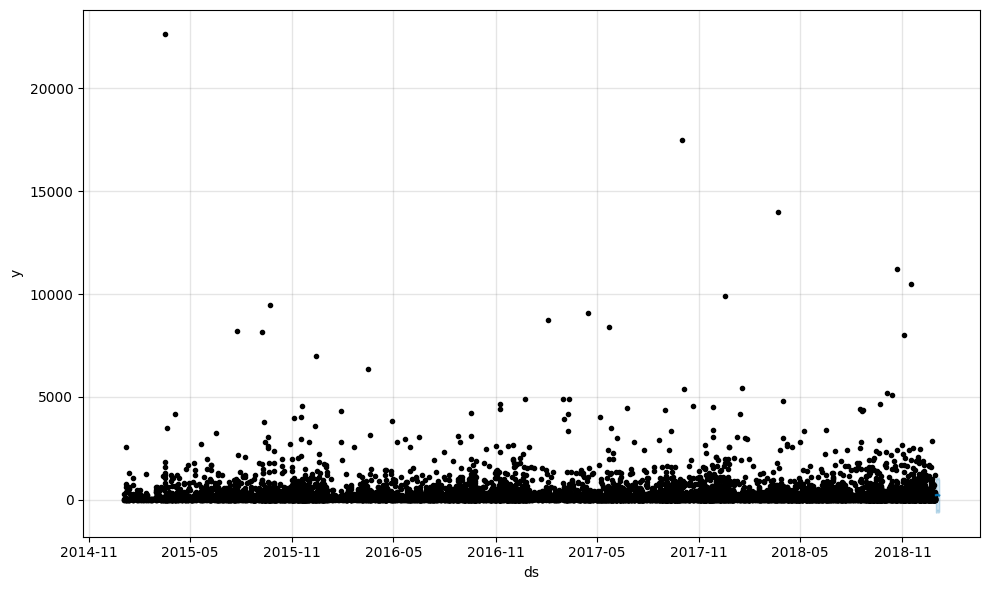

In [ ]:
final_model.plot(predict)

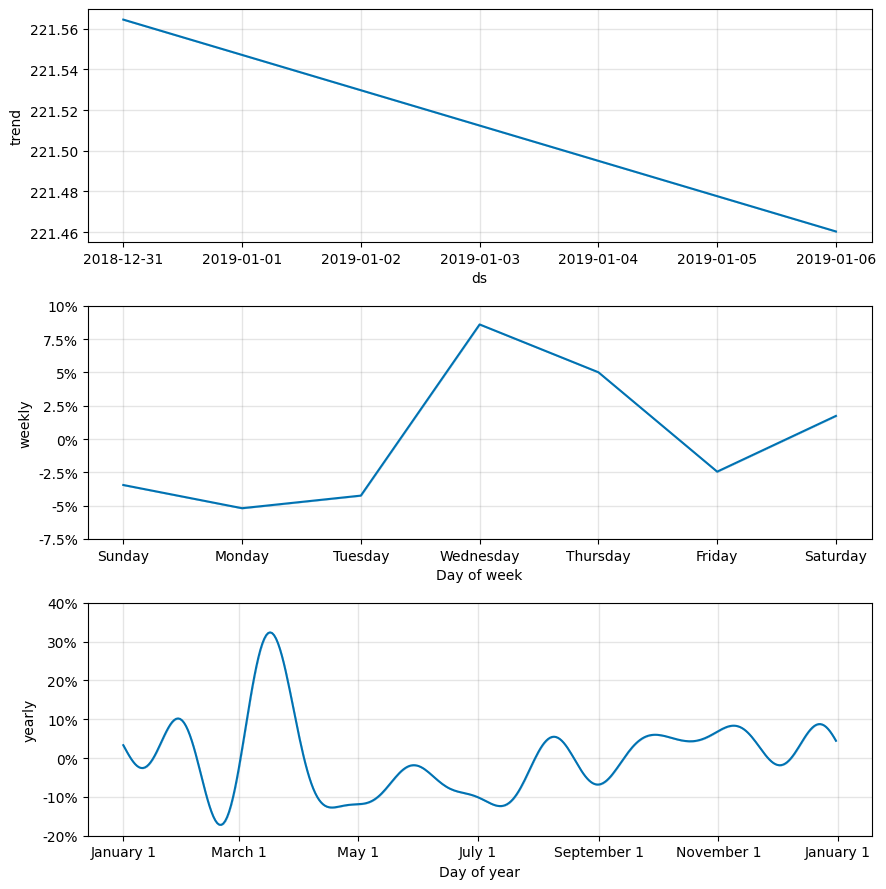

In [ ]:
fig = final_model.plot_components(predict)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(final_model, predict)

In [ ]:
plot_components_plotly(final_model, predict)